Практична робота №1


In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

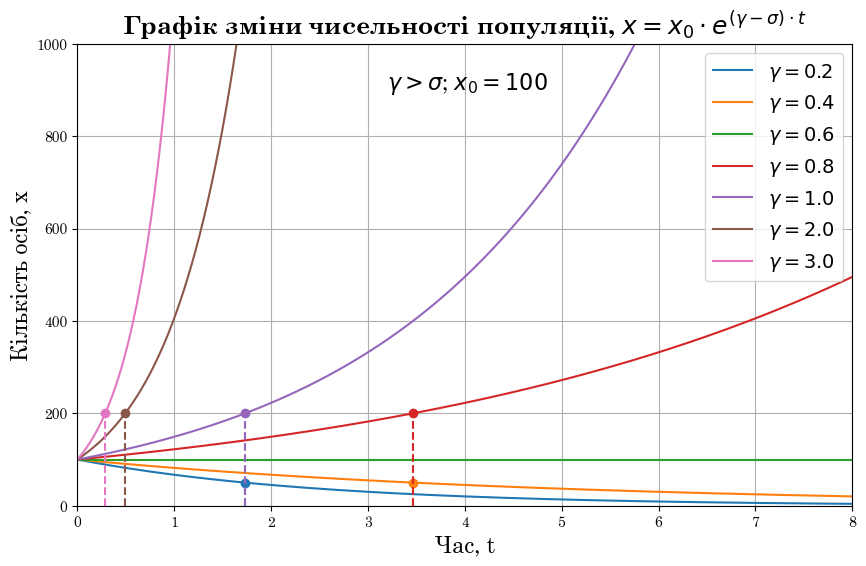

   Коефіцієнт розмноження, γ  Коефіцієнт росту, ε          T0.5
0                        0.2                 -0.4  1.700000e+00
1                        0.4                 -0.2  3.500000e+00
2                        0.6                  0.0  6.243315e+15
3                        0.8                  0.2  3.500000e+00
4                        1.0                  0.4  1.700000e+00
5                        2.0                  1.4  5.000000e-01
6                        3.0                  2.4  3.000000e-01


In [175]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['font.family'] = 'Century Schoolbook'

x0 = 100
sigma = 0.6  
t = np.arange(0, 10, 0.01)  
gamma_dic = np.arange(0.2, 1, 0.2)  
gamma_int = np.arange(1, 4, 1)  
gamma = np.append(gamma_dic, gamma_int)  

epsilon_val = []
T05_val = []

plt.figure(figsize=(10, 6))

for gamma_val in gamma:
    x = x0 * np.exp((gamma_val - sigma) * t) 
    
    line, = plt.plot(t, x, label=r'$\gamma = {:.1f}$'.format(gamma_val))
    curve_color = line.get_color()
    
    if gamma_val != sigma:  
        epsilon = gamma_val - sigma
        T05 = np.log(2) / abs(epsilon) 
        
        epsilon_val.append(round(epsilon, 1))
        T05_val.append(round(T05, 1))

        plt.vlines(T05, 0, x0 * np.exp((gamma_val - sigma) * T05), color=curve_color, linestyle='--')
        plt.plot(T05, x0 * np.exp((gamma_val - sigma) * T05), 'o', color=curve_color)  # Точка перетину

plt.xlim(0, 8)
plt.ylim(0, 1000)
plt.xlabel('Час, t', fontsize=16)
plt.ylabel('Кількість осіб, x', fontsize=16)
plt.title(r'Графік зміни чисельності популяції, $x = x_0 \cdot e^{(\gamma - \sigma) \cdot t}$', fontsize = 18, fontweight='bold')
plt.text(3.2, 900, r'$\gamma > \sigma$; $x_0 = 100$', fontsize = 16)
plt.legend(fontsize=14, loc='upper right')
plt.grid()
plt.show()

data = {
    'Коефіцієнт розмноження, γ': gamma,
    'Коефіцієнт росту, ε': epsilon_val,
    'T0.5': T05_val
}

df = pd.DataFrame(data)

print(df)
